## 加载数据

In [1]:
from tensorflow.keras.datasets import reuters

In [30]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [33]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [34]:
# 将新闻解码为文本
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])  #注意，索引减去了3，因为0、1、2分别是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）保留的索引

In [35]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [36]:
train_labels[10]

3

## 准备数据

In [37]:
# 用multi-hot编码对整数序列进行编码
import numpy as np
def vectorze_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension)) # 创建一个形状为(len(sequences), dimension)的零矩阵
    for i,sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1. 
    return results

In [38]:
x_train = vectorze_sequences(train_data)  #将训练数据向量化
x_test = vectorze_sequences(test_data)  #将测试数据向量化

In [57]:
# 编码标签
'''def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results 

y_train = to_one_hot(train_labels)  #将训练标签向量化
y_test = to_one_hot(test_labels)  #将测试标签向量化

'''
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 构建模型

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
# 模型定义
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [60]:
# 编译模型
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [61]:
# 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [62]:
# 训练模型
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.6855 - accuracy: 0.5340 - val_loss: 1.7789 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4198 - accuracy: 0.7095 - val_loss: 1.3196 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0484 - accuracy: 0.7737 - val_loss: 1.1360 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8243 - accuracy: 0.8242 - val_loss: 1.0785 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6578 - accuracy: 0.8636 - val_loss: 0.9682 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5296 - accuracy: 0.8919 - val_loss: 0.9266 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4260 - accuracy: 0.9133 - val_loss: 0.9104 - val_accuracy: 0.8160
Epoch 8/20
16

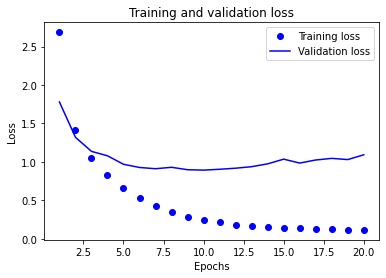

In [67]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")  #"bo"表示“蓝色圆点”
plt.plot(epochs, val_loss, "b", label="Validation loss")  # "b"表示“蓝色实线”
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

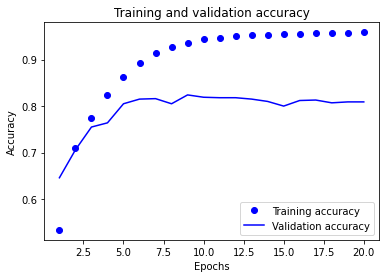

In [68]:
plt.clf()  # 清空图像
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
# 模型在9轮之后开始过拟合。我们从头开始训练一个新模型，训练9轮，然后在测试集上评估模型
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 27ms/step - loss: 2.1145 - accuracy: 0.5688
Epoch 2/9
18/18 [==============================] - 0s 23ms/step - loss: 1.0784 - accuracy: 0.7653
Epoch 3/9
18/18 [==============================] - 0s 23ms/step - loss: 0.7646 - accuracy: 0.8338
Epoch 4/9
18/18 [==============================] - 0s 23ms/step - loss: 0.5498 - accuracy: 0.8829
Epoch 5/9
18/18 [==============================] - 0s 23ms/step - loss: 0.4032 - accuracy: 0.9149
Epoch 6/9
18/18 [==============================] - 0s 24ms/step - loss: 0.3084 - accuracy: 0.9336
Epoch 7/9
18/18 [==============================] - 0s 24ms/step - loss: 0.2467 - accuracy: 0.9420
Epoch 8/9
18/18 [==============================] - 0s 24ms/step - loss: 0.2103 - accuracy: 0.9462
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9826 - accuracy: 0.8014


In [79]:
results

[0.9825668931007385, 0.8014247417449951]

## 对新数据进行预测

In [80]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [81]:
predictions[0].shape

(46,)

In [82]:
np.sum(predictions[0])

0.99999994

In [83]:
np.argmax(predictions[0])

3